In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load training data
feature_data = pd.read_csv('features.csv')
feature_data = feature_data.drop(['Id'], axis=1)
feature_data.head()

# Load test data
feature_data_test = pd.read_csv('test_features.csv')
feature_data_test = feature_data_test.drop(['Id'], axis=1)
feature_data_test.head()

,gabor_mean,haralick_0,haralick_1,haralick_2,haralick_3,haralick_4,haralick_5,haralick_6,haralick_7,haralick_8,...,hog_41,hog_99,hog_35,hog_50,hog_36,hog_92,hog_159,hog_91,hog_19,Pawpularity
0,53.206177,0.000124,2484.200912,-0.003729,1237.496173,0.023909,256.533880,2465.783781,7.647652,13.182735,...,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.6775
1,52.530518,0.000126,2441.251570,-0.000681,1219.797339,0.025251,256.126694,2437.937788,7.641476,13.170859,...,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.5915
2,51.601440,0.000128,2396.830100,-0.010810,1185.600037,0.025555,255.163666,2345.570048,7.613555,13.153338,...,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.2002
3,51.967407,0.000126,2438.623324,-0.002863,1215.832428,0.024106,256.246974,2424.706389,7.635438,13.160787,...,0.353553,0.353553,0.353553,0.353553,0.353553,0.337308,0.360796,0.355814,0.353553,0.9453
4,53.976929,0.000124,2487.905057,-0.001471,1242.125395,0.025049,255.436312,2480.596522,7.654224,13.184636,...,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.8982


In [15]:
#With outliers
y = feature_data['Pawpularity']
x = feature_data.iloc[:, :-1]

# Split the data into training and testing sets
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

#With outliers
y_test = feature_data_test['Pawpularity']
x_test = feature_data_test.iloc[:, :-1]

#Without outliers
#y = feature_data['Pawpularity']
#x = feature_data.iloc[:, :-1]

# Split the data into training and testing sets
#x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

#Filtrar as amostras onde "Pawpularity" não é igual a 1
#filtered_data = x_train[y_train != 1]
#filtered_data.head()
#x_train=filtered_data
#y_train=y_train[y_train != 1]

#Without outliers
#y_test = feature_data_test['Pawpularity']
#x_test = feature_data_test.iloc[:, :-1]

#Filtrar as amostras onde "Pawpularity" não é igual a 1
#filtered_data_test = x_test[y_test != 1]
#filtered_data_test.head()
#x_test=filtered_data_test
#y_test=y_test[y_test != 1]

In [3]:
# Ridge Regression

# Define the alpha values to test
alphas = [0.01, 0.1, 1, 10, 100, 1000]

# Define the number of features to select
num_features_range = [8, 18, 28, 35, 43] 

# Store the results
results = {'alpha': [], 'num_features': [], 'mse': [], 'r2': [], 'features_selected': [], 'coefficients': []}

# Loop to iterate over alpha values and number of features
for alpha in alphas:
    for num_features in num_features_range:
        # Perform Recursive Feature Elimination (RFE)
        rfe = RFE(Ridge(alpha=alpha), n_features_to_select=num_features)
        x_rfe = rfe.fit_transform(x_train, y_train)
        
        # Fit Ridge Regression model
        ridge_model = Ridge(alpha=alpha)
        ridge_model.fit(x_rfe, y_train)

        # Make predictions on the val set
        x_val_rfe = rfe.transform(x_val)
        y_pred = ridge_model.predict(x_val_rfe)

        # Calculate metrics
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)

        # Store results in the dictionary
        results['alpha'].append(alpha)
        results['num_features'].append(num_features)
        results['mse'].append(rmse)
        results['r2'].append(r2)
        results['features_selected'].append(list(x.columns[rfe.support_]))
        results['coefficients'].append(ridge_model.coef_)

        # Print results for each combination of features
        print(f"\nAlpha: {alpha}, Num Features: {num_features}")
        print(f"Features Selected: {list(x.columns[rfe.support_])}")
        print(f"MSE: {rmse}")
        print(f"R^2: {r2}")        

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.62887e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 8
Features Selected: ['haralick_12', 'hog_49', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_35']
MSE: 0.21058875866798812
R^2: -0.003258718204711686


/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.62887e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 18
Features Selected: ['haralick_4', 'haralick_9', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159']
MSE: 0.2104514933905598
R^2: -0.0019512628070614824


/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.62887e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 28
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19']
MSE: 0.21027498795607724
R^2: -0.0002712967660476462


/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.62887e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.01, Num Features: 35
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19']
MSE: 0.21006375594248236
R^2: 0.0017373415102268641

Alpha: 0.01, Num Features: 43
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'total_entropy', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'variance_green', 'variance_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', '

/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.62887e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.62887e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.61969e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 8
Features Selected: ['haralick_12', 'hog_49', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99', 'hog_35']
MSE: 0.21050819677164567
R^2: -0.002491260668459061


/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.61969e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 18
Features Selected: ['haralick_2', 'haralick_4', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159']
MSE: 0.210288525672692
R^2: -0.0004000978696818702

Alpha: 0.1, Num Features: 28
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19']
MSE: 0.2102477890341507
R^2: -1.2544723186458384e-05


/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.61969e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.61969e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 0.1, Num Features: 35
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haralick_4', 'haralick_5', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'lbp_mean', 'mean_red', 'mean_green', 'mean_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19']
MSE: 0.2100344973299067
R^2: 0.002015407054164031

Alpha: 0.1, Num Features: 43
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'total_entropy', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'variance_green', 'variance_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_

/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.61969e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/utilizador/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.61969e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T



Alpha: 1, Num Features: 8
Features Selected: ['haralick_4', 'haralick_11', 'hog_49', 'hog_103', 'hog_31', 'hog_100', 'hog_90', 'hog_99']
MSE: 0.21057514785352346
R^2: -0.0031290367622820447

Alpha: 1, Num Features: 18
Features Selected: ['haralick_2', 'haralick_4', 'haralick_11', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_159']
MSE: 0.21028425872005357
R^2: -0.0003595001574112633

Alpha: 1, Num Features: 28
Features Selected: ['haralick_0', 'haralick_2', 'haralick_4', 'haralick_7', 'haralick_8', 'haralick_10', 'haralick_11', 'haralick_12', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36', 'hog_92', 'hog_159', 'hog_91', 'hog_19']
MSE: 0.2102388283627798
R^2: 7.26936792607713e-05

Alpha: 1, Num Features: 35
Features Selected: ['gabor_mean', 'haralick_0', 'haralick_2', 'haral

In [4]:
# Find the combination with the minimum MSE
best_combination = results_df.loc[results_df['mse'].idxmin()]

print("\nBest Combination:")
print(best_combination)

# Print the selected features for the best combination
selected_features = best_combination['features_selected']
print("\nSelected Features for the Best Combination:")
print(selected_features)


Best Combination:
alpha                                                             10.0
num_features                                                        43
mse                                                           0.209919
r2                                                            0.003111
features_selected    [gabor_mean, haralick_0, haralick_1, haralick_...
coefficients         [-0.00048554085381453797, 0.004766932392009508...
Name: 19, dtype: object

Selected Features for the Best Combination:
['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3', 'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8', 'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation', 'lbp_mean', 'total_entropy', 'mean_red', 'mean_green', 'mean_blue', 'variance_red', 'variance_green', 'variance_blue', 'hog_95', 'hog_49', 'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30', 'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', '

Selected Features: Index(['gabor_mean', 'haralick_0', 'haralick_1', 'haralick_2', 'haralick_3',
       'haralick_4', 'haralick_5', 'haralick_6', 'haralick_7', 'haralick_8',
       'haralick_9', 'haralick_10', 'haralick_11', 'haralick_12', 'saturation',
       'lbp_mean', 'total_entropy', 'mean_red', 'mean_green', 'mean_blue',
       'variance_red', 'variance_green', 'variance_blue', 'hog_95', 'hog_49',
       'hog_27', 'hog_88', 'hog_103', 'hog_28', 'hog_31', 'hog_96', 'hog_30',
       'hog_100', 'hog_90', 'hog_41', 'hog_99', 'hog_35', 'hog_50', 'hog_36',
       'hog_92', 'hog_159', 'hog_91', 'hog_19'],
      dtype='object')
Coefficients: [-5.67116915e-04  2.11063019e-03  6.66035278e-06  2.66323293e-03
  1.49683096e-06  4.19937772e-03 -1.70042654e-03 -6.73029371e-07
  1.05573198e-02  7.50806120e-03  1.68782589e-05 -1.25056802e-02
 -3.87127461e-03  4.17454509e-04 -1.06350415e-04 -1.69553629e-02
 -5.83805050e-09  1.13236064e-03  2.26778228e-03 -8.46068995e-06
  8.45368152e-06 -1.21380495

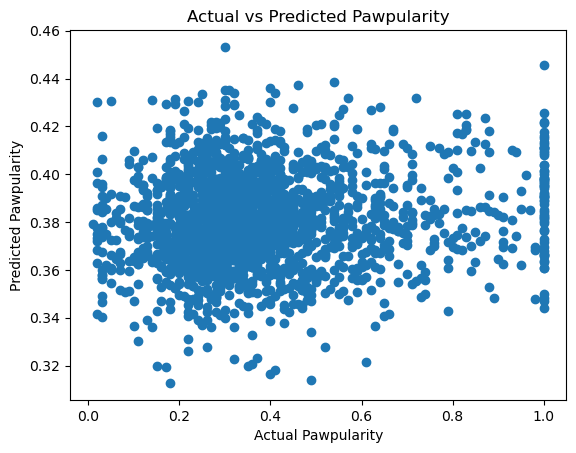

In [16]:
# Define the alpha value and number of features
alpha = 100

# Fit Ridge Regression model
ridge_model = Ridge(alpha=alpha)
rfe=RFE(ridge_model,n_features_to_select=43)
x_rfe=rfe.fit_transform(x_train,y_train)

#get the selected features
selected_features = x.columns[rfe.support_]
ridge_model.fit(x_train[selected_features], y_train)

# Make predictions
y_pred = ridge_model.predict(x_val[selected_features])

# Display the metrics of the best model
print(f"Selected Features: {selected_features}")
print(f"Coefficients: {ridge_model.coef_}")
print('Root Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_val, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_val, y_pred))

# Plot the predictions against the actual values
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Pawpularity')
plt.ylabel('Predicted Pawpularity')
plt.title('Actual vs Predicted Pawpularity')
plt.show()

In [17]:
# Selecione as mesmas features que foram selecionadas no conjunto de treinamento
x_test = x_test[selected_features]

# previsões no conjunto de teste
y_test_pred = ridge_model.predict(x_test)

# Exibição das métricas de desempenho no conjunto de teste (opcional)
print('Root Mean squared error on test set: %.5f' % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Coefficient of determination on test set: %.5f' % r2_score(y_test, y_test_pred))

Root Mean squared error on test set: 0.38958
Coefficient of determination on test set: -0.77793


In [18]:
# Random Forest

# Define the parameter grid
param_grid = {
    'n_estimators': [50], # values tested were 20, 25, 30, 50, 80
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}

# Perform grid search on Random Forest
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, verbose=3)
grid.fit(x_train, y_train)

# Get the best parameters
best_aparams = grid.best_params_

# Get the best estimator
best_estimator = grid.best_estimator_

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.008 total time=   5.4s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.006 total time=   4.1s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=-0.002 total time=   8.7s
[CV 4/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.008 total time=   3.1s
[CV 5/5] END max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.005 total time=   3.9s
[CV 1/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.008 total time=   4.4s
[CV 2/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=0.009 total time=   3.1s
[CV 3/5] END max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=50;, score=-0.001 total time=   3.2s
[CV 4/5

In [6]:
best_aparams, best_estimator

({'max_depth': 4,
  'min_samples_leaf': 8,
  'min_samples_split': 6,
  'n_estimators': 25},
 RandomForestRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=6,
                       n_estimators=25))

In [7]:
# Make predictions with the best estimator
y_pred = best_estimator.predict(x_train)

# Get the model performance metrics
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_train, y_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_train, y_pred))

Mean squared error: 0.17461
Coefficient of determination: 0.04198


In [19]:
# Make predictions with the best estimator
y_test_pred = best_estimator.predict(x_test)

# Get the model performance metrics
print('Mean squared error: %.5f' % np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('Coefficient of determination: %.5f' % r2_score(y_test, y_test_pred))

Mean squared error: 0.37918
Coefficient of determination: -0.68428


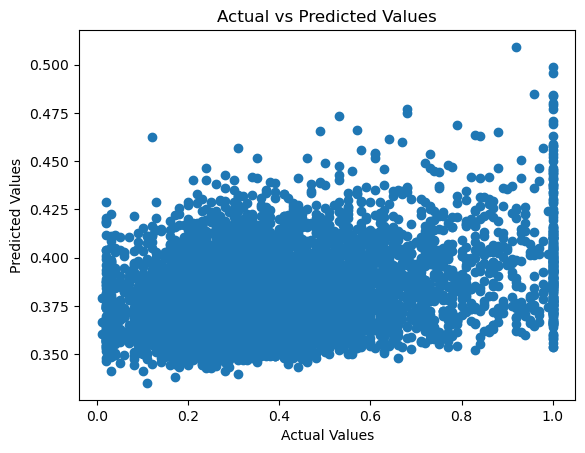

In [30]:
# Scatter plot of actual versus predicted values
plt.scatter(y_train, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()